In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

## K次交叉驗證(K-fold cross-validation)

In [2]:
boston = load_boston()
boston.feature_names

C:\Users\reaganwei\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
df_data = pd.DataFrame(boston['data'],columns=boston.feature_names)
df_target = pd.DataFrame(boston['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,
                                                    test_size = 0.3,
                                                    random_state=42)

In [4]:
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [5]:
y_pred = reg_all.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R^2', reg_all.score(X_test, y_test))
print('RMSE: \n', rmse)

R^2 0.7112260057484908
RMSE: 
 4.63868992617284


In [6]:
cv_results = cross_val_score(reg_all, X_train, y_train, cv=10)

In [7]:
print(cv_results)
print("Average 10-Fold CV Score: {:.4f}".format(np.mean(cv_results)))

[0.70959865 0.76558212 0.22459595 0.79719424 0.74179327 0.78747687
 0.80023421 0.73001495 0.77970143 0.53915526]
Average 10-Fold CV Score: 0.6875


## 接收者操作特征曲線(ROC Curve)

In [8]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

C:\Users\reaganwei\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


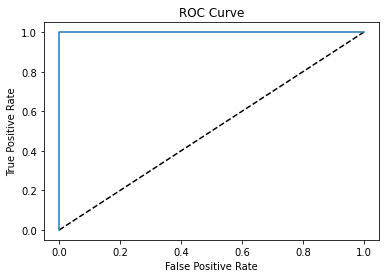

In [9]:
iris = datasets.load_iris()
df_data = pd.DataFrame(iris['data'], columns=iris.feature_names)
df_target = pd.DataFrame(iris['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(df_data[0:100],
                                                    df_target[0:100],
                                                    test_size = 0.4,
                                                    random_state=42)
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

[[23  0]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

1.0
